In [1]:
# Imports
import matplotlib

# matplotlib.use('GTKAgg')  # Or any other X11 back-end

import numpy as np
import pandas as pd
import nltk
# nltk.download() # Download NLTK datasets

import seaborn as sns
%matplotlib inline

from nltk.corpus import stopwords # Import the stop word list
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

sns.set() # Prettify all matplotlib plots


In [2]:
train_df = pd.read_csv('data/train.tsv', delimiter = '\t', encoding = 'utf-8')
test_df = pd.read_csv('data/test.tsv', delimiter = '\t', encoding = 'utf-8')

# Get some basic info
print("Train data dimensions: " + str(train_df.shape))
print("Train columns: " + str(train_df.columns.values))

print("Test data dimensions: " + str(test_df.shape))
print("Test columns: " + str(test_df.columns.values))


Train data dimensions: (156060, 4)
Train columns: ['PhraseId' 'SentenceId' 'Phrase' 'Sentiment']
Test data dimensions: (66292, 3)
Test columns: ['PhraseId' 'SentenceId' 'Phrase']


In [16]:
sample_submission_df = pd.read_csv('data/sampleSubmission.csv', delimiter = ',', encoding = 'utf-8')
print("Sample submission data dimensions: " + str(sample_submission_df.shape))
print("Sample submission columns: " + str(sample_submission_df.columns.values))

Sample submission data dimensions: (66292, 2)
Sample submission columns: ['PhraseId' 'Sentiment']


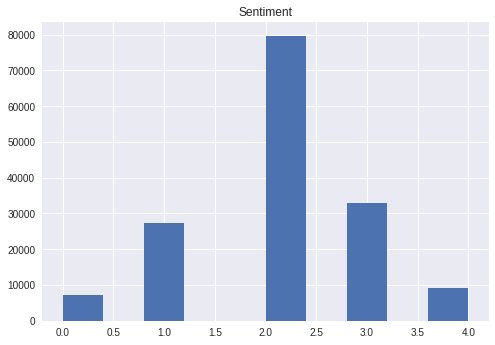

In [3]:
# Visualize the distribution of our dataset in sentiment.

train_df.hist(column = "Sentiment")
plt.show()

In [18]:
# Create a new column with the word count evaluated
train_df['phrase_length'] = train_df['Phrase'].str.len()

In [19]:
stops = set(stopwords.words("english")) 

def clean_df(df):
    df['phrase_cleaned'] = df['Phrase'].str.lower() # Lowercases the strings
    df['phrase_cleaned'] = df['phrase_cleaned'].str.split().apply(lambda x: " ".join([item for item in x if item not in stops]))
    
clean_df(train_df)

In [20]:
print(train_df['Phrase'][0])
print(train_df['phrase_cleaned'][0])

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
series escapades demonstrating adage good goose also good gander , occasionally amuses none amounts much story .


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    analyzer = "word", \
    tokenizer = None, \
    preprocessor = None, \
    stop_words = None, \
    max_features = 5000)

train_data_features = vectorizer.fit_transform(train_df['phrase_cleaned']).toarray()
print(train_data_features.shape)

(156060, 5000)


In [22]:
# Take a look at the words in the vocabulary
vocab = np.array(vectorizer.get_feature_names())

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

dist_sort_idxs = dist.argsort()[::-1]
dist = dist[dist_sort_idxs]
vocab = vocab[dist_sort_idxs]

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print(count, tag)

6733 film
6241 movie
3784 one
3190 like
2539 story
2438 rrb
2261 good
2098 lrb
1919 time
1882 characters
1872 much
1813 comedy
1718 life
1624 even
1605 little
1583 funny
1535 well
1529 way
1414 make
1345 movies
1338 director
1324 love
1305 new
1305 bad
1272 work
1253 enough
1218 us
1198 made
1180 old
1170 action
1168 two
1160 something
1151 would
1123 best
1114 never
1094 many
1073 people
1027 self
1019 makes
1018 character
997 world
992 first
986 may
985 see
985 plot
979 films
977 drama
969 could
920 better
917 audience
907 long
897 look
895 big
892 re
888 really
888 sense
884 man
881 feel
872 without
871 real
864 great
859 every
856 humor
826 screen
819 year
818 another
812 ever
811 minutes
810 get
789 hollywood
772 still
765 performances
760 cast
759 fun
750 human
725 family
724 nothing
718 hard
714 heart
712 less
710 performance
704 often
698 might
695 american
687 things
684 far
683 kind
667 moments
664 script
660 acting
659 seen
659 also
657 back
655 end
649 interesting
648 origi

132 substance
132 believable
132 sophisticated
132 greatest
132 fit
132 non
132 damned
131 telling
131 grant
131 anti
131 happen
131 spiritual
131 slight
131 masterpiece
131 deal
131 witty
130 funnier
130 directors
130 slapstick
130 queen
130 ability
130 20
130 festival
130 weird
130 means
130 among
130 alone
130 joke
130 steven
130 key
130 typical
130 sensitive
130 franchise
130 release
129 treatment
129 twisted
129 intrigue
129 watchable
129 chan
129 utterly
128 waste
128 provocative
128 industry
128 shallow
128 conventional
128 ms
128 meditation
128 no
128 tedious
127 number
127 manipulative
127 cause
127 foreign
127 science
126 figure
126 rate
126 ages
126 endearing
126 effective
126 south
126 standard
126 sandler
126 lacking
125 central
125 terms
125 society
125 usually
125 chemistry
125 drag
125 deserves
124 amount
124 artistic
124 wise
124 dreams
124 turned
124 holiday
124 2002
124 third
124 ill
123 poorly
123 intimate
123 universal
123 motion
122 paced
122 guilty
122 routine
12

73 russian
73 darker
73 after
73 count
73 cynical
73 saying
72 justify
72 pile
72 payoff
72 tarantino
72 beginning
72 logic
72 ambition
72 achievement
72 presents
72 started
72 holocaust
72 crush
72 went
72 sweeping
72 eventually
72 nostalgia
72 kong
72 sympathy
72 sour
72 paul
72 gifted
72 by
72 burns
72 serves
71 precious
71 loose
71 benigni
71 poem
71 vulgar
71 realize
71 oriented
71 sink
71 stereotypes
71 excess
71 schneider
71 dawson
71 bigger
71 offering
71 fairy
71 natured
71 creativity
71 washington
71 daring
71 timely
71 capable
71 rhythm
71 manhattan
71 creation
71 memories
71 collection
71 charms
71 choose
71 roger
70 van
70 dysfunctional
70 exhilarating
70 admire
70 ghost
70 features
70 100
70 fair
70 stuck
70 cloying
70 yes
70 total
70 satirical
70 bleak
70 fake
70 flashy
70 belt
70 actresses
70 mill
70 refreshingly
70 loving
70 affecting
70 candy
70 carries
70 13
69 distance
69 thousands
69 frida
69 blend
69 deft
69 meets
69 parts
69 delivered
69 simultaneously
69 mature


49 express
49 rising
49 tried
49 closing
49 titles
49 attitude
49 captivating
49 bucks
49 assassin
49 accept
49 shanghai
49 ambiguous
49 existed
49 chances
49 blow
49 wet
49 adds
49 hugh
49 luck
49 invention
49 unoriginal
49 unlikable
49 esther
49 jackie
49 gem
49 esque
49 freshness
49 stays
49 pianist
49 enterprise
49 stands
49 gut
49 squeeze
49 doses
49 martha
49 mainly
49 semi
48 destination
48 forces
48 overlong
48 dynamic
48 visit
48 shining
48 wins
48 joan
48 singing
48 jewish
48 physical
48 birthday
48 built
48 favorite
48 cage
48 instincts
48 flamboyant
48 joe
48 godard
48 decidedly
48 flesh
48 generous
48 strictly
48 flop
48 obstacles
48 vein
48 objective
48 decency
48 followed
48 begin
48 shoulders
48 insulting
48 kicking
48 attract
48 structured
48 movement
48 arc
48 cheat
48 soulful
48 evelyn
48 celluloid
48 replaced
48 emptiness
48 madonna
48 taylor
48 everyday
48 legal
48 lifestyle
48 charmer
48 latter
48 climactic
48 returns
48 waters
48 hill
48 rewards
48 rice
48 constr

37 afternoon
37 stuart
37 altman
37 greater
37 titular
37 recovery
37 gel
37 humane
37 mtv
37 blockbuster
37 remote
37 education
37 mexican
37 castro
37 sensitivity
37 traveler
37 craven
37 facing
37 angry
37 miracle
37 under
37 freedom
37 trapped
37 mo
37 angels
37 mothers
37 benefit
37 theory
37 piano
37 dares
37 delicious
37 droll
37 measured
37 gift
37 inevitably
37 base
37 queens
37 zhang
37 earn
37 opens
37 elizabeth
37 than
37 contest
37 baby
37 transcends
37 liberating
37 drew
37 elusive
37 psychologically
37 exact
37 psycho
37 conceits
37 jarring
37 sincerity
37 proportions
37 jordan
37 roberts
37 develop
37 frozen
37 soaked
37 raise
37 virtues
37 controversy
37 projects
37 participants
37 composition
37 inventiveness
37 outtakes
37 treats
37 breathtakingly
37 deliberate
37 tense
37 distinctly
36 aimed
36 hokum
36 exceedingly
36 disappointingly
36 wilco
36 incongruous
36 surprised
36 hoped
36 pokes
36 19
36 robin
36 meaningless
36 conventions
36 precision
36 evident
36 transce

29 bollywood
29 bogdanovich
29 oedekerk
29 debate
29 inappropriate
29 unknown
29 cuban
29 unhappy
29 sarah
29 innovation
29 innovative
29 innuendo
29 thrilling
29 toss
29 disintegrating
29 boobs
29 wesley
29 betrayal
29 optimistic
29 hurley
29 opportunities
29 exists
29 covers
29 dud
29 pit
29 yard
29 elegance
29 pink
29 hitler
29 scott
29 immediately
29 impenetrable
29 inquiry
29 themed
29 sticky
29 shrek
29 tends
29 vast
29 duvall
29 greatness
29 1984
29 brilliance
29 gloss
29 discourse
29 growth
29 zero
29 blandness
29 significance
29 obscure
29 handle
29 insistent
29 conflicted
29 east
29 whimper
29 institution
29 explores
28 honor
28 banderas
28 detached
28 bonus
28 ratliff
28 dim
28 generations
28 musty
28 yorker
28 lola
28 unconditional
28 lyne
28 rambling
28 as
28 sway
28 asleep
28 yellow
28 misguided
28 races
28 molly
28 card
28 geeks
28 assembled
28 sucked
28 ought
28 unchecked
28 raises
28 crackle
28 shootings
28 you
28 1950s
28 wing
28 passed
28 chaos
28 masterfully
28 boas

In [23]:
plt.plot(dist)
plt.show()

In [24]:
# Plot Sentiment vs phrase_length
train_df.plot(x='phrase_length', y='Sentiment', style='o', kind='scatter')
plt.show()

In [25]:
# That wasn't very helpful. Let's try a box plot instead.
train_df.boxplot(column='phrase_length', by='Sentiment')
plt.show()

ax = sns.violinplot(x="Sentiment", y="phrase_length", data=train_df)
plt.show()

Visualizing the phrase length along a sentiment reveals that neutral sentiment phrases are typically shorter and low-variance.

In [26]:
# bins = [0, 25, 50, 75, 100]
# categories = pd.cut(train_df['phrase_length'], bins)

std = train_df['phrase_length'].std()
std

38.154129861956434

In [27]:
# Split our data into a train and validation set
X_train, X_val, y_train, y_val = train_test_split(
    train_df.drop(['Sentiment'], axis = 1), 
    train_df['Sentiment'], 
    test_size = 0.2, 
    random_state = 42)

In [28]:
# Define a super basic model that only returns neutral sentiment
class NaiveModel():
    def predict(self, phrases):
        return np.full((len(phrases), 1), 2)

In [29]:
# Use the naive model to run a predication on our cross validation dataset
naive_model = NaiveModel()
predictions = naive_model.predict(train_df['Phrase'])
print(len(predictions))

156060


In [40]:
def print_metrics(predictions, actual):
    # With these, we now have a basic benchmark that we want to outperform
    print("Accuracy: " + str(metrics.accuracy_score(actual, predictions)))
    print(metrics.classification_report(actual, predictions))

print_metrics(predictions, train_df['Sentiment'])

Accuracy: 0.50994489299
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      7072
          1       0.00      0.00      0.00     27273
          2       0.51      1.00      0.68     79582
          3       0.00      0.00      0.00     32927
          4       0.00      0.00      0.00      9206

avg / total       0.26      0.51      0.34    156060



/home/hdavidzhu/miniconda3/envs/ml_is/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
print("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100, verbose=3, n_jobs=-1) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit(train_data_features, train_df["Sentiment"])

Training the random forest...
building tree 4 of 100building tree 5 of 100building tree 7 of 100building tree 9 of 100building tree 13 of 100building tree 1 of 100building tree 25 of 100building tree 26 of 100building tree 6 of 100building tree 8 of 100building tree 10 of 100building tree 11 of 100building tree 27 of 100building tree 15 of 100building tree 17 of 100building tree 18 of 100building tree 21 of 100building tree 31 of 100building tree 32 of 100building tree 33 of 100building tree 34 of 100building tree 12 of 100building tree 14 of 100building tree 19 of 100building tree 36 of 100building tree 3 of 100building tree 16 of 100building tree 42 of 100building tree 28 of 100building tree 24 of 100building tree 45 of 100building tree 2 of 100building tree 20 of 100building tree 43 of 100building tree 44 of 100building tree 29 of 100building tree 46 of 100building tree 49 of 100building tree 50 of 100building tree 51 of 100building tree 35 of 100building tree 22 of 100building tree

[Parallel(n_jobs=-1)]: Done  11 out of 100 | elapsed:  9.0min remaining: 72.5min
[Parallel(n_jobs=-1)]: Done  45 out of 100 | elapsed:  9.0min remaining: 11.0min
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:  9.1min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.7min finished


In [34]:
from sklearn.externals import joblib
joblib.dump(forest, 'forest_v1_170430.pkl')

['forest_v1_170430.pkl']

In [38]:
forest_predictions = forest.predict(train_data_features)

[Parallel(n_jobs=96)]: Done  11 out of 100 | elapsed:    2.3s remaining:   18.4s
[Parallel(n_jobs=96)]: Done  45 out of 100 | elapsed:    2.7s remaining:    3.2s
[Parallel(n_jobs=96)]: Done  79 out of 100 | elapsed:    3.1s remaining:    0.8s
[Parallel(n_jobs=96)]: Done 100 out of 100 | elapsed:    4.6s finished


In [42]:
print_metrics(forest_predictions, train_df['Sentiment'])

Accuracy: 0.80594643086
             precision    recall  f1-score   support

          0       0.77      0.67      0.72      7072
          1       0.78      0.68      0.73     27273
          2       0.82      0.91      0.86     79582
          3       0.80      0.71      0.75     32927
          4       0.81      0.69      0.74      9206

avg / total       0.80      0.81      0.80    156060



In [47]:
# Preprocessing submission data
clean_df(test_df)

# Use model to predict results
test_data_features = vectorizer.fit_transform(test_df['phrase_cleaned']).toarray()
test_forest_predictions = forest.predict(test_data_features)

[Parallel(n_jobs=96)]: Done  11 out of 100 | elapsed:    1.3s remaining:   10.4s
[Parallel(n_jobs=96)]: Done  45 out of 100 | elapsed:    1.5s remaining:    1.8s
[Parallel(n_jobs=96)]: Done  79 out of 100 | elapsed:    1.8s remaining:    0.5s
[Parallel(n_jobs=96)]: Done 100 out of 100 | elapsed:    2.2s finished


In [49]:
# Save output to csv for submission
# print(test_forest_predictions.shape)
test_df['Sentiment'] = test_forest_predictions

In [52]:
submission_df = test_df[['PhraseId', 'Sentiment']].copy()
submission_df.to_csv(path_or_buf='data/submission_01.csv', index=False)

After submitting to Kaggle, we got back `0.43603` as our accuracy. This was pretty dissapointing, considering the `0.80594643086` accuracy on our training dataset. Our random forest is significantly overfit on the training data, and I think this is because we are using too many features.